In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

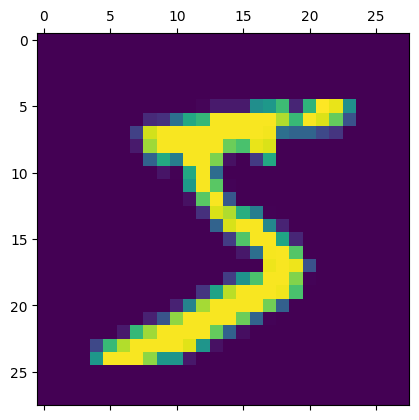

In [5]:
plt.matshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2606 - accuracy: 0.9236
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1120 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0794 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0610 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0483 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0395 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0279 - accuracy: 0.9904
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0244 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9758


[0.1024724468588829, 0.9757999777793884]

In [10]:
y_test_predicted = model.predict(X_test)
y_test_predicted = [np.argmax(i) for i in y_test_predicted]
y_test_predicted[:5]

313/313 [==============================] - 0s 1ms/step


[7, 2, 1, 0, 4]

In [11]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [12]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_test_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    3,    1,    2,    1,    1,    2,    0],
       [   0, 1118,    4,    3,    0,    1,    2,    0,    7,    0],
       [   1,    2, 1008,    6,    3,    0,    2,    6,    3,    1],
       [   0,    0,    3,  986,    0,    8,    0,    5,    4,    4],
       [   0,    1,    3,    1,  968,    1,    2,    1,    1,    4],
       [   2,    0,    0,    7,    1,  878,    1,    1,    1,    1],
       [   3,    1,    1,    2,    8,   18,  922,    0,    3,    0],
       [   1,    1,   11,    0,    3,    0,    0, 1003,    4,    5],
       [   4,    0,    6,   14,    5,    3,    0,    2,  937,    3],
       [   0,    2,    0,    6,   16,    3,    0,    9,    5,  968]],
      dtype=int32)>

<Axes: >

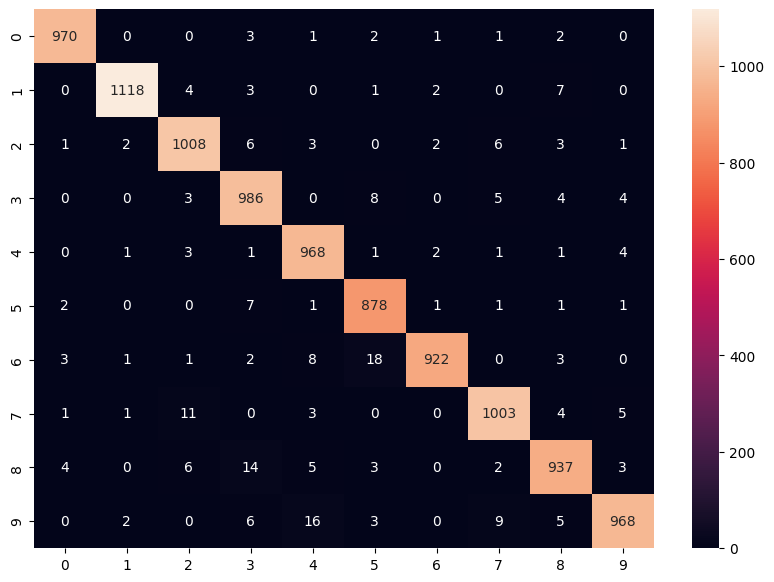

In [13]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')